# Problem Statement : Classifying Spam Emails with Natural Language Processing (NLP)



# Step 1 : Importing basic libraries, and the dataset (Data Collection)

The dataset used can be found at : https://www.kaggle.com/datasets/gokulraja84/emails-dataset-for-spam-detection

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt # We only need pyplot
sb.set() # Set the default Seaborn style for graphics

In [ ]:
# Importing the file
from google.colab import files
files.upload()

In [3]:
# Creating and cleaning the dataframe
mainData = pd.read_csv('/content/Emails.csv')
data = mainData.where((pd.notnull(mainData)), '') #actually no need for this step, just removes all the slots that equals to 'NaN'
data = data[['text', 'spam']]
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


#Step 2 : Exploratory Data Analysis



##Using Natural Language Processing (NLP) pre-processing techniques to make sense of the unstructured text data.

The dataset we have is difficult to analyse as it is unstructured text. The first step is to extract features of the unstructured text so we can make sense of it.


In [4]:
## Importing Libraries and Methods
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append("subject")
stop.append("enron")
stop.append("ect")

def tokenize_words(text):

  punct_list = ["!",'"',"#","$","%","&","'","(",")","*","+",",","-",".","/",":",";","<","=",">","?","@","[",'\\',"]","^","_","`","{","|","}","~"]
  replace_list = ["\n","\t"]

  # Iterate through the punctuation list and replace each item with a space + the item
  for x in punct_list:
    text = text.replace(x," ")

  # Iterate through the replace list and replace it with a space
  for x in replace_list:
    text = text.replace(x," ")

  return text

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  lemmatizer.lemmatize(text)
  return text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
df = pd.DataFrame(mainData)
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(tokenize_words)
df["text"] = df["text"].apply(lemmatize_text)
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df1 = df[df['spam'] == 1] #Spam
df2 = df[df['spam'] == 0] #Ham

print(df1) #Print Processed Spam
print(df2) #Print Processed Ham

                                                   text  spam
0     naturally irresistible corporate identity lt r...     1
1     stock trading gunslinger fanny merrill muzo co...     1
2     unbelievable new homes made easy im wanting sh...     1
3     4 color printing special request additional in...     1
4     money get software cds software compatibility ...     1
...                                                 ...   ...
1363  ready get hello viagra 1 med struggle mens ere...     1
1364  would like 250 gas card let current high price...     1
1365  immediate reply needed dear sir dr james alabi...     1
1366  wanna see get fisted fist bang show everything...     1
1367  hot stock info drgv announces another press re...     1

[1368 rows x 2 columns]
                                                   text  spam
1368  hello guys bugging completed questionnaire one...     0
1369  sacramento weather station fyi forwarded mike ...     0
1370  india newsdesk jan 18 th newsclips vinc

## First piece of exploratory analysis we did was to count which words most frequently appeared in the emails labelled as Spam and not Spam respectively, and make observations.

In [6]:
# Calculating the frequency of each word
spam_vocab = df1.text.str.split(expand=True).stack().value_counts()
ham_vocab = df2.text.str.split(expand=True).stack().value_counts()

spam_freq = pd.DataFrame(spam_vocab)
ham_freq = pd.DataFrame(ham_vocab)

In [7]:
#Display result
print("Top 20 ocurring words in Spam Set:\n",spam_freq.head(20))
print("\n")
print("Top 20 ocurring words in Non-Spam Set:\n",ham_freq.head(20))

Top 20 ocurring words in Spam Set:
              count
com            999
1              952
business       844
company        805
email          804
information    740
e              701
5              687
money          662
2              613
free           606
3              604
http           600
get            590
mail           586
please         581
one            581
000            560
us             537
click          531


Top 20 ocurring words in Non-Spam Set:
           count
vince      8531
hou        5569
2000       4935
kaminski   4770
com        4444
please     4386
would      4151
cc         3889
j          3693
pm         3262
2001       3060
research   2670
thanks     2523
1          2490
2          2323
know       2297
group      2255
10         2213
time       2212
energy     2115




---


We noticed that there are some similarities in the top 20 most frequently ocurring words in both sets, namely :
<ul>
  <li>Integers<i>
  <li>"please"
  <li>"com"</i>
</ul>

We conclude that these do not help in classifying Spam from Non-Spam. It can be confirmed by plotting a correlation matrix to those words and spam or ham.

<Axes: >

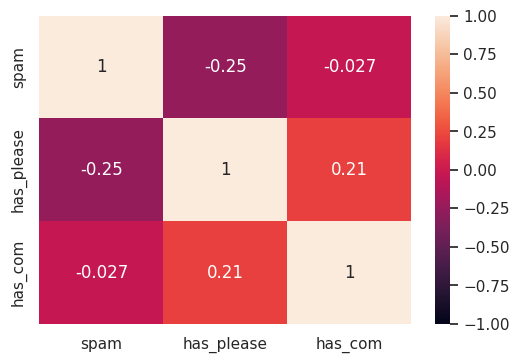

In [ ]:
df['has_please'] = np.where((df["text"].str.contains("please")),1,0)
df['has_com'] = np.where((df["text"].str.contains("com")),1,0)

spam = df["spam"]
has_please = df["has_please"]
has_com = df["has_com"]

f, axes = plt.subplots(figsize = (6,4))
corr = pd.concat([spam, has_please, has_com], axis = 1).corr()
sb.heatmap(data = corr, vmin = -1, vmax = 1, annot = True)

We can observe there is low correlation between : <br>
spam and has_please : -0.25 (low correlation) <br>
spam and has_com : -0.027 (low correlation)

Our conclusions are confirmed to be correct.



---


We do want to highlight the existence of interesting words that
are frequently present in the Spam Set, and provide probable explanations to it. Specifically :
<ul><b>Group 1</b>
  <li><i>"business"
  <li>"company"
  <li>"money"</i>
</ul>
<ul><b>Group 2</b>
  <li><i>"free"
  <li>"http"
  <li>"click"</i>
</ul>
The words in Group 1 relate to money, and the words in Group 2 outline a narrative of gaining something at a low cost of action (clicking a link).

Both groups have an overarching concept of Greed, which may be an emotion that spam emails may try to invoke in users to get them to do something.

#Step 3 : Using Machine Learning (ML) to solve our problem (Core Analysis)

Extracting features from our data :

In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report, make_scorer

X = data['text']
Y = data['spam']

# Splitting the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Extracting features of the text using the vectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype('int')
y_pred_svm_rbf_test = y_test.astype('int')

##3.1 : Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train_features, y_train)

In [ ]:
# Make predictions on the training data; evaluate the accuracy
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Model accuracy on Training Data : ', accuracy_on_training_data)

Model accuracy on Test Data :  0.9965080750763858


In [ ]:
# Make predictions on the test data; evaluate the accuracy
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Model accuracy on Test Data: ', accuracy_on_test_data)

Model accuracy on Training Data:  0.9834205933682374


In [ ]:
# User interface for the Spam Filter
# input()
input_your_mail = [""]

input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)

if (prediction[0] == 1):
  print('Spam')
else:
  print('Ham')

Ham


##3.2 Using Naive Bayes Classifier

Naive Bayes Classifier Confusion Matrix:
[[871   0]
 [101 174]]
Naive Bayes Classifier Accuracy: 0.9118673647469459
Naive Bayes Classifier Precision: 1.0
Naive Bayes Classifier Recall: 0.6327272727272727
Naive Bayes Classifier F1-score: 0.775055679287305


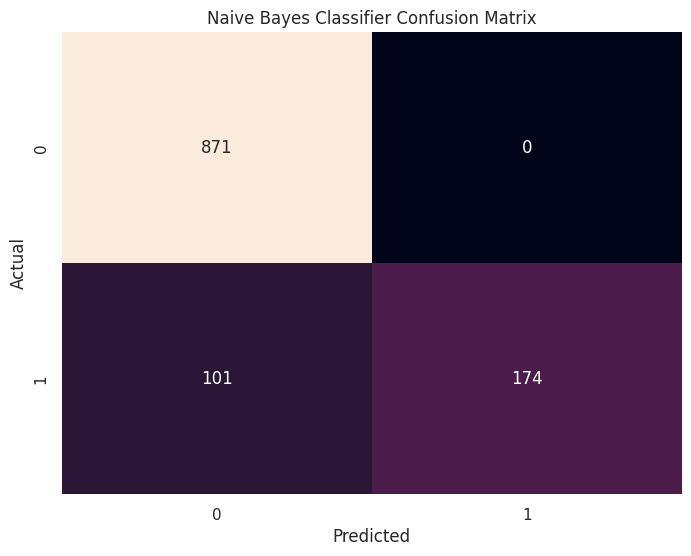

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
clf_nb = MultinomialNB()

# Train the classifier
clf_nb.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test_features)

# Generate confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate accuracy metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Classifier Confusion Matrix:")
print(cm_nb)
print("Naive Bayes Classifier Accuracy:", accuracy_nb)
print("Naive Bayes Classifier Precision:", precision_nb)
print("Naive Bayes Classifier Recall:", recall_nb)
print("Naive Bayes Classifier F1-score:", f1_nb)

# Plot confusion matrix heatmap for Naive Bayes Classifier
plt.figure(figsize=(8, 6))
sb.heatmap(cm_nb, annot=True, fmt="d", cbar=False)
plt.title("Naive Bayes Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##3.3 Using Support Vector Machine with RBF Kernel

SVM with RBF Kernel Confusion Matrix:
[[869   2]
 [  7 268]]
SVM with RBF Kernel Accuracy: 0.9921465968586387
SVM with RBF Kernel Precision: 0.9925925925925926
SVM with RBF Kernel Recall: 0.9745454545454545
SVM with RBF Kernel F1-score: 0.98348623853211


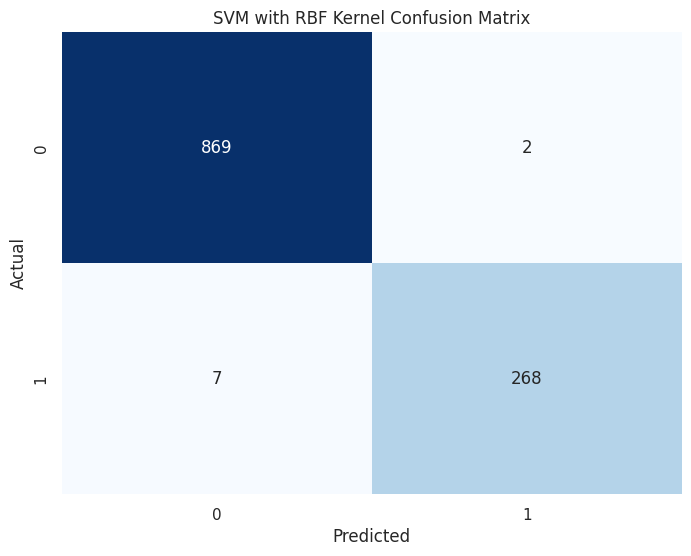

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
clf_svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier
clf_svm_rbf.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_svm_rbf = clf_svm_rbf.predict(X_test_features)

# Generate confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Calculate accuracy metrics for SVM with RBF kernel
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)

print("SVM with RBF Kernel Confusion Matrix:")
print(cm_svm_rbf)
print("SVM with RBF Kernel Accuracy:", accuracy_svm_rbf)
print("SVM with RBF Kernel Precision:", precision_svm_rbf)
print("SVM with RBF Kernel Recall:", recall_svm_rbf)
print("SVM with RBF Kernel F1-score:", f1_svm_rbf)

# Plot confusion matrix heatmap for SVM with RBF kernel
plt.figure(figsize=(8, 6))
sb.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##3.4 Using Random Forest

Random Forest Confusion Matrix:
[[871   0]
 [ 24 251]]
Random Forest Accuracy: 0.9790575916230366
Random Forest Precision: 1.0
Random Forest Recall: 0.9127272727272727
Random Forest F1-score: 0.9543726235741445


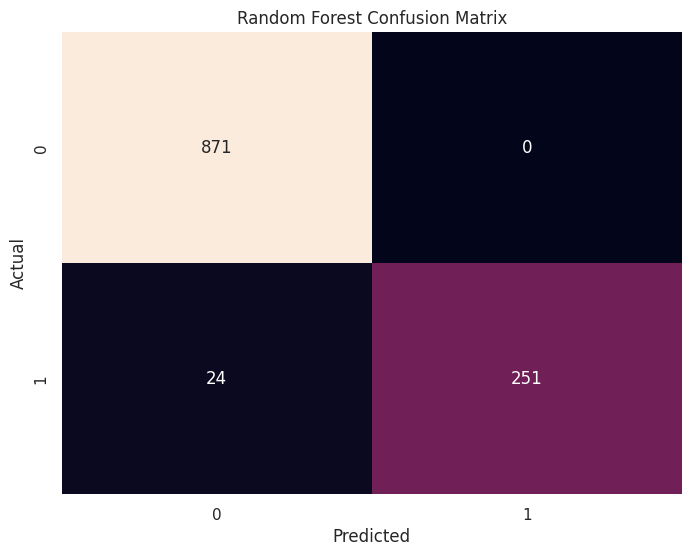

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier (Random Forest Classifier)
clf_rf = RandomForestClassifier()

# Train the classifier
clf_rf.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test_features)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(cm_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# Plot confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sb.heatmap(cm_rf, annot=True, fmt="d", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Step 4 : Comparing Models

In [ ]:
print("Accuracy of Models : ")
print("Logistic Regression : ", accuracy_on_test_data)
print("Naive Bayes : ", accuracy_nb)
print("Support Vector Machine : ", accuracy_svm_rbf)
print("Random Forest : ", accuracy_rf)

print(max(accuracy_on_test_data,accuracy_nb,accuracy_svm_rbf,accuracy_rf),"has the highest accuracy.")

Accuracy of Models : 
Linear Rgression :  0.9834205933682374
Naive Bayes :  0.9118673647469459
Support Vector Machine :  0.9921465968586387
Random Forest :  0.9825479930191972
0.9921465968586387 has the highest accuracy.


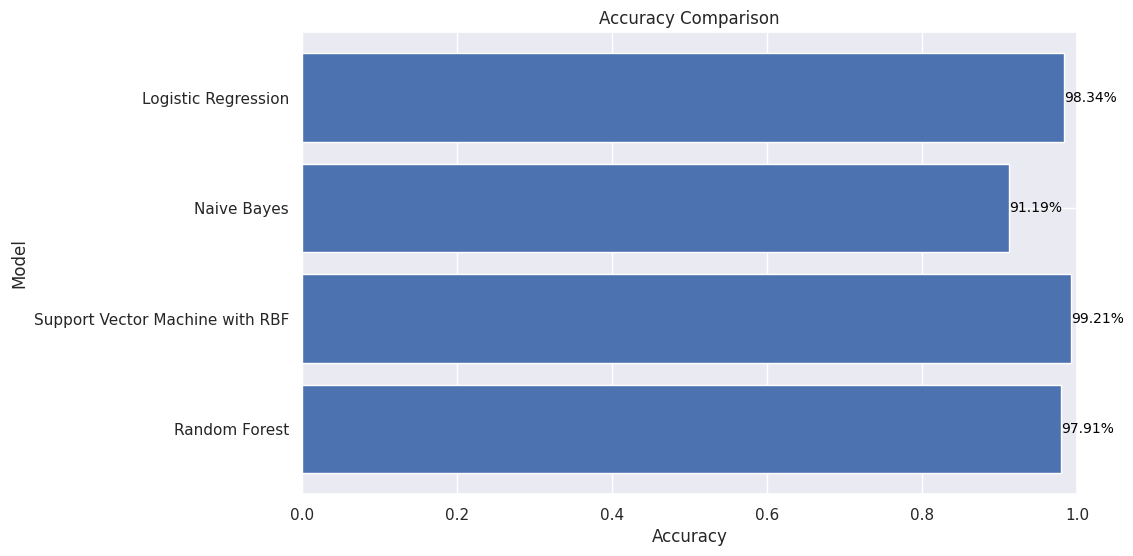

In [ ]:
# List of classifiers and their corresponding accuracy scores
classifiers = ["Logistic Regression", "Naive Bayes", "Support Vector Machine with RBF", "Random Forest"]
accuracies = [accuracy_on_test_data, accuracy_nb, accuracy_svm_rbf, accuracy_rf]
# Plotting the accuracy scores with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Percentage labels on each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy*100:.2f}%',
             va='center', ha='left', fontsize=10, color='black')

plt.show()